<a href="https://colab.research.google.com/github/Darwin575/CSE422_Courseworks/blob/main/single_perceptron_lariosa.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

In [ ]:
# Download latest version
path = kagglehub.dataset_download("radheshyamkollipara/bank-customer-churn")

print("Path to dataset files:", path)

100%|██████████| 307k/307k [00:00<00:00, 53.6MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/radheshyamkollipara/bank-customer-churn/versions/1


Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5073 - loss: 0.7027
Epoch 2/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5344 - loss: 0.6768
Epoch 3/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6485 - loss: 0.6534
Epoch 4/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7692 - loss: 0.6336
Epoch 5/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7923 - loss: 0.6166
Epoch 6/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8004 - loss: 0.5984
Epoch 7/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7934 - loss: 0.5887
Epoch 8/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7926 - loss: 0.5786
Epoch 9/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7982 - loss: 0.5657
Epoch 10/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7951 - loss: 0.5591
Epoch 11/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8038 - loss: 0.5464
Epoch 12/100
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

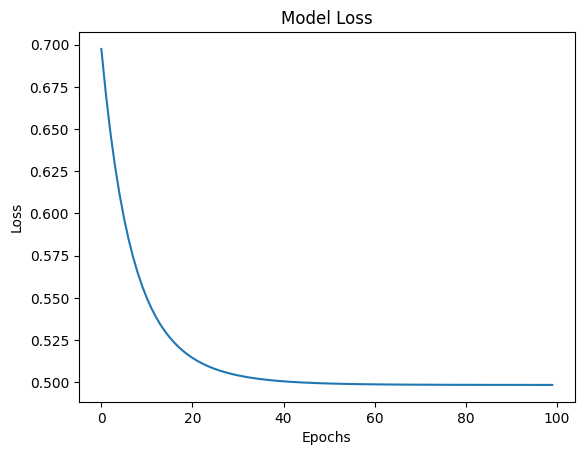

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


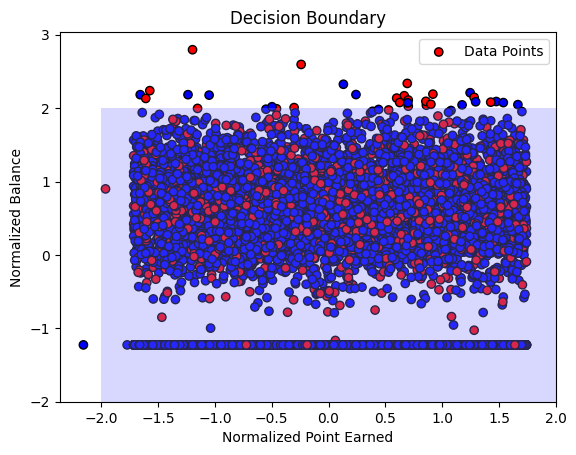

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
import matplotlib.pyplot as plt

# Load your data from Kaggle Hub
data = pd.read_csv('/root/.cache/kagglehub/datasets/radheshyamkollipara/bank-customer-churn/versions/1/Customer-Churn-Records.csv')

# Select relevant columns
X = data[['Point Earned', 'Balance']]
y = data['Exited']

# Convert data to numpy arrays
X = np.array(X)
y = np.array(y).reshape(-1, 1)

# Normalize the input data
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Single-layer perceptron
model = Sequential()
model.add(Dense(1, input_dim=2, activation='sigmoid'))

# Compile the model
model.compile(optimizer=SGD(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X, y, epochs=100, verbose=1)

# Test the model
predictions = model.predict(X)
print("Predictions:")
print((predictions > 0.5).astype(int))  # Convert probabilities to binary classifications

# Plot training loss
plt.plot(history.history['loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Visualize the classification decision boundary
xx, yy = np.meshgrid(
    np.linspace(-2, 2, 100),  # Adjust grid range based on normalization
    np.linspace(-2, 2, 100)
)
grid = np.c_[xx.ravel(), yy.ravel()]
grid_predictions = model.predict(grid).reshape(xx.shape)

# Plot data points and decision boundary
plt.scatter(X[:, 0], X[:, 1], c=y.ravel(), cmap='bwr', edgecolor='k', label='Data Points')
plt.contourf(xx, yy, grid_predictions, levels=[0, 0.5, 1], alpha=0.3, cmap='bwr')
plt.title('Decision Boundary')
plt.xlabel('Normalized Point Earned')
plt.ylabel('Normalized Balance')
plt.legend()
plt.show()

In [ ]:
# Get user input for Balance and Tenure
point_earned = float(input("Enter Point Earned: "))
Balance = float(input("Enter Balance: "))

# Normalize the input using the same normalization parameters as the training data
mean_point_earned = np.mean(X[:, 0])
std_point_earned = np.std(X[:, 0])
mean_Balance = np.mean(X[:, 1])
std_Balance = np.std(X[:, 1])

normalized_point_earned = (point_earned - mean_point_earned) / std_point_earned
normalized_Balance = (Balance - mean_Balance) / std_Balance

# Create the input array for the model
user_input = np.array([[normalized_point_earned, normalized_Balance]])

# Predict using the model
prediction = model.predict(user_input)[0][0]

# Classify and print the result
if prediction > 0.5:
    print("Classification: Customer Likely to Exit")
else:
    print("Classification: Customer Unlikely to Exit")

Enter Point Earned: 100
Enter Balance: 10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
Classification: Customer Unlikely to Exit
